# 국민청원 Word2vec


## Word2Vec(Word Embedding to Vector)

컴퓨터는 숫자만 인식할 수 있고 한글, 이미지는 바이너리 코드로 저장 됩니다.

* one hot encoding(예 [0000001000]) 혹은 Bag of Word에서 vector size가 매우 크고 sparse 하므로 neural net 성능이 잘 나오지 않습니다.
* `주위 단어가 비슷하면 해당 단어의 의미는 유사하다` 라는 아이디어
* 단어를 트레이닝 시킬 때 주위 단어를 label로 매치하여 최적화
* 단어를 `의미를 내포한 dense vector`로 매칭 시키는 것

* Word2Vec은 분산 된 텍스트 표현을 사용하여 개념 간 유사성을 봅니다. 
* 예를 들어, 파리와 프랑스가 베를린과 독일이 (수도와 나라) 같은 방식으로 관련되어 있음을 이해합니다.

![word2vec](https://1.bp.blogspot.com/-Q7F8ulD6fC0/UgvnVCSGmXI/AAAAAAAAAbg/MCWLTYBufhs/s1600/image00.gif)
이미지 출처 : https://opensource.googleblog.com/2013/08/learning-meaning-behind-words.html

* 단어의 임베딩과정을 실시간으로 시각화 : [word embedding visual inspector](https://ronxin.github.io/wevi/)


![CBOW와 Skip-Gram](https://i.imgur.com/yXY1LxV.png)
출처 : https://arxiv.org/pdf/1301.3781.pdf
 Tomas Mikolov, Ilya Sutskever, Kai Chen, Greg Corrado, and Jeffrey Dean. Distributed Representations of Words and Phrases and their Compositionality. In Proceedings of NIPS, 2013.

## CBOW와 Skip-Gram
* CBOW와 Skip-Gram기법이 있다.

    * CBOW(continuous bag-of-words)는 전체 텍스트로 하나의 단어를 예측하기 때문에 작은 데이터셋일 수록 유리하다.    
    * 아래 예제에서 __ 에 들어갈 단어를 예측한다.
<pre>
1) __가 맛있다. 
2) __를 타는 것이 재미있다. 
3) 평소보다 두 __로 많이 먹어서 __가 아프다.
</pre>

    * Skip-Gram은 타겟 단어들로부터 원본 단어를 역으로 예측하는 것이다. CBOW와는 반대로 컨텍스트-타겟 쌍을 새로운 발견으로 처리하고 큰 규모의 데이터셋을 가질 때 유리하다.
    * `배`라는 단어 주변에 올 수 있는 단어를 예측한다.
    
    <pre>
    1) *배*가 맛있다. 
    2) *배*를 타는 것이 재미있다. 
    3) 평소보다 두 *배*로 많이 먹어서 *배*가 아프다.
    </pre>



## Word2Vec 참고자료
* [word2vec 모델 · 텐서플로우 문서 한글 번역본](https://tensorflowkorea.gitbooks.io/tensorflow-kr/g3doc/tutorials/word2vec/)
* [Word2Vec으로 문장 분류하기 · ratsgo's blog](https://ratsgo.github.io/natural%20language%20processing/2017/03/08/word2vec/)
* [CS224n: Natural Language Processing with Deep Learning](http://web.stanford.edu/class/cs224n/syllabus.html)
* [Word2Vec Tutorial - The Skip-Gram Model · Chris McCormick](http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/)

### 논문
* [Efficient Estimation of Word Representations in
Vector Space](https://arxiv.org/pdf/1301.3781v3.pdf)
* [Distributed Representations of Words and Phrases and their Compositionality](http://papers.nips.cc/paper/5021-distributed-representations-of-words-and-phrases-and-their-compositionality.pdf)

## Gensim

* [gensim: models.word2vec – Deep learning with word2vec](https://radimrehurek.com/gensim/models/word2vec.html)
* [gensim: Tutorials](https://radimrehurek.com/gensim/tutorial.html)
* [한국어와 NLTK, Gensim의 만남 - PyCon Korea 2015](https://www.lucypark.kr/docs/2015-pyconkr/)


In [1]:
!apt -qq -y install fonts-nanum

import matplotlib as mpl
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
mpl.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.


In [2]:
!pip install soynlp
!pip show soynlp

     |████████████████████████████████| 419kB 2.8MB/s 
Name: soynlp
Version: 0.0.493
Summary: Unsupervised Korean Natural Language Processing Toolkits
Home-page: https://github.com/lovit/soynlp
Author: Lovit
Author-email: soy.lovit@gmail.com
License: UNKNOWN
Location: /usr/local/lib/python3.6/dist-packages
Requires: scipy, scikit-learn, numpy, psutil
Required-by: 


In [3]:
# !pip install gensim
!pip show gensim

Name: gensim
Version: 3.6.0
Summary: Python framework for fast Vector Space Modelling
Home-page: http://radimrehurek.com/gensim
Author: Radim Rehurek
Author-email: me@radimrehurek.com
License: LGPLv2.1
Location: /usr/local/lib/python3.6/dist-packages
Requires: smart-open, scipy, numpy, six
Required-by: 


In [0]:
import pandas as pd
import numpy as np
import re

# 텍스트 데이터 전처리 

# soynlp를 사용해 토큰화

## 텍스트 데이터 전처리 이해하기

(출처 : [트위터 한국어 형태소 분석기](https://github.com/twitter/twitter-korean-text))

### 정규화 normalization (입니닼ㅋㅋ -> 입니다 ㅋㅋ, 샤릉해 -> 사랑해)

* 한국어를 처리하는 예시입니닼ㅋㅋㅋㅋㅋ -> 한국어를 처리하는 예시입니다 ㅋㅋ

### 토큰화 tokenization

* 한국어를 처리하는 예시입니다 ㅋㅋ -> 한국어Noun, 를Josa, 처리Noun, 하는Verb, 예시Noun, 입Adjective, 니다Eomi ㅋㅋKoreanParticle

### 어근화 stemming (입니다 -> 이다)

* 한국어를 처리하는 예시입니다 ㅋㅋ -> 한국어Noun, 를Josa, 처리Noun, 하다Verb, 예시Noun, 이다Adjective, ㅋㅋKoreanParticle


### 어구 추출 phrase extraction

* 한국어를 처리하는 예시입니다 ㅋㅋ -> 한국어, 처리, 예시, 처리하는 예시

Introductory Presentation: [Google Slides](https://docs.google.com/presentation/d/10CZj8ry03oCk_Jqw879HFELzOLjJZ0EOi4KJbtRSIeU/)

In [0]:
petitions = pd.read_csv('https://s3.ap-northeast-2.amazonaws.com/data10902/petition/petition.csv', parse_dates=['start', 'end'])

In [6]:
petitions.shape

(395547, 8)

In [7]:
petitions.info

<bound method DataFrame.info of         article_id  ...                                            content
0               21  ...  스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...
1               22  ...  현 정부에 국민들이 가장 원하는 것은 부패척결입니다.  우리 사회에 각종 비리들이 ...
2               23  ...  만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ...
3               24  ...  현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...
4               25  ...  만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ...
...            ...  ...                                                ...
395542      517117  ...  명절고속도로 무료보단 대다수의 서민들이 이용하는 대중교통 무료와 명절기간 증차로 했...
395543      517119  ...  광주사태 유공자들 차고 넘치는데 이래 많은 유공자들 그냥놓아두면 재앙이다.\n김대중...
395544      517120  ...  명절이면 후로 제일문제는 쓰레기 문제 입니다.\n제일문제는 선물세트와 농산물세트 입...
395545      517121  ...  좌파 더불어민주당, 좌파 정권 청화대는 선한 국민들을 더는 기망하지 말고 담장 답하...
395546      517122  ...                              국민들이 원합니다\n폐지 좀 시키세요;

[395547 rows x 8 columns]>

In [8]:
petitions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395547 entries, 0 to 395546
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   article_id  395547 non-null  int64         
 1   start       395547 non-null  datetime64[ns]
 2   end         395547 non-null  datetime64[ns]
 3   answered    395547 non-null  int64         
 4   votes       395547 non-null  int64         
 5   category    395547 non-null  object        
 6   title       395547 non-null  object        
 7   content     395546 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 24.1+ MB


In [9]:
petitions.describe()

,article_id,answered,votes
count,395547.000000,395547.000000,3.955470e+05
mean,251608.934635,0.000073,1.501188e+02
std,153219.216242,0.008562,4.802583e+03
min,21.000000,0.000000,0.000000e+00
25%,115236.500000,0.000000,2.000000e+00
50%,253682.000000,0.000000,5.000000e+00
75%,386137.500000,0.000000,1.500000e+01
max,517122.000000,1.000000,1.192049e+06


In [10]:
petitions.head()

,article_id,start,end,answered,votes,category,title,content
0,21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...
1,22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...
2,23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."
3,24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...
4,25,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."


In [11]:
petitions.tail()

,article_id,start,end,answered,votes,category,title,content
395542,517117,2019-02-04,2019-03-06,0,3,보건복지,명절연휴 고속도로 무료반대,명절고속도로 무료보단 대다수의 서민들이 이용하는 대중교통 무료와 명절기간 증차로 했...
395543,517119,2019-02-04,2019-03-06,0,23,보건복지,광주사태 가짜 유공자들 정수기로 걸려내야함,광주사태 유공자들 차고 넘치는데 이래 많은 유공자들 그냥놓아두면 재앙이다.\n김대중...
395544,517120,2019-02-04,2019-03-06,0,0,안전/환경,환경문제,명절이면 후로 제일문제는 쓰레기 문제 입니다.\n제일문제는 선물세트와 농산물세트 입...
395545,517121,2019-02-04,2019-03-06,0,20,정치개혁,"청화대,더불어민주당, 당장 답하라,,,,,,","좌파 더불어민주당, 좌파 정권 청화대는 선한 국민들을 더는 기망하지 말고 담장 답하..."
395546,517122,2019-02-04,2019-03-06,0,16,인권/성평등,여성부 폐지,국민들이 원합니다\n폐지 좀 시키세요;


In [0]:
# 전체 데이터 중 투표가 1000건 이상인 데이터를 기준으로 가져오기. Outlier 데이터 제거를 위해 10만건 이상 데이터도 제거.
df = petitions.loc[(petitions['votes'] > 1000) & (petitions['votes'] < 100000)].copy()

In [0]:
# 전체 데이터 중 동의 수 500건 이상인 데이터 가져오기
df2 = petitions.loc[(petitions['votes']> 500)].copy()

In [14]:
df.shape

(3359, 8)

In [15]:
df2.shape

(5388, 8)

In [16]:
df2.head()

,article_id,start,end,answered,votes,category,title,content
7,28,2017-08-19,2017-08-26,0,2137,경제민주화,소액주주를 보호해주십시오,** 존경하옵는 문재인대통령님께\n저는 중국원양자원이라는 KOSPI상장사의 소액 ...
13,34,2017-08-19,2017-09-18,0,679,기타,『국가유공자 등 예우 및 지원에 관한법률』상「6.25전몰군경 자녀수당」의 불합리한 ...,(현황)\n우리들 아버지께서는 67여년전 북의 남침으로 조국이 위기에 처했을 때 젊...
21,43,2017-08-19,2017-09-18,0,11293,육아/교육,기간제 교사의 정규직화를 반대합니다.,"대통령님, 안녕하세요. 저는 임용을 준비하고 수험생입니다. 처음 기간제 정규직화 된..."
24,46,2017-08-19,2017-09-18,0,1933,육아/교육,기간제교사의 정규직화를 반대합니다.,"대통령님, 안녕하세요. 저는 임용을 준비하고 수험생입니다. 처음 기간제 정규직화 된..."
28,50,2017-08-19,2017-10-18,0,1251,일자리,치과위생사 국가고시 날짜 변경 억울합니다,안녕하십니까? 대통령님 간단하게 제소개 부터 하겠습니다. 저는 치위생과 3학년 학생...


In [17]:
df2.tail()

,article_id,start,end,answered,votes,category,title,content
394876,516130,2019-02-03,2019-03-05,0,1499,문화/예술/체육/언론,대한민국 순국선열유족회 기관지 월간 <순국>지가 폐간되지 않게 해주세요.,지령 336호 월간 <순국>이 폐간 위기에 놓였습니다.\n<순국>지는 사단법인 '대...
395247,516667,2019-02-04,2019-03-06,0,3353,경제민주화,악덕기업 화승 4달치 판매대금 불법으로 어음주고 수백명 매니져들한테 떠넘기고 회...,k스위스 르까프 머렐 화승 3개 브렌드 매니져들한테 판매대금 어...
395352,516820,2019-02-04,2019-03-06,0,4930,인권/성평등,섬에서 갇혀살아가는 성매매여성들을 도와주세요.,섬에 다방이나 성매매 업자들에게 과한 빚이나 폭력으로 묶여 삶을 유린당하는 여성들이...
395407,516901,2019-02-04,2019-03-06,0,718,외교/통일/국방,대한민국 예비역 장성모임(성우회)를 구성하고 있는 전직 고위장성들의 연금을 박탈하고...,올해는 3.1운동과 임시정부 수립 100주년을 맞는 해입니다. 더구나 시민들의 촛불...
395488,517037,2019-02-04,2019-03-06,0,938,인권/성평등,"군,경의 90% 남성할당제. 공정한 기회는 도대체 누구에게 주어졌습니까?","일부 공무원시험에서도, 경찰대학교나 사관학교에서도, 또한 군과 협약을 맺은 여타 고..."


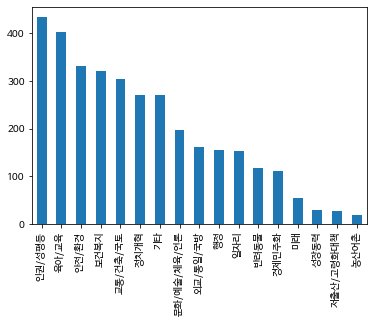

In [18]:
category_count = df['category'].value_counts()
category_count
%matplotlib inline
category_count.plot(kind='bar')

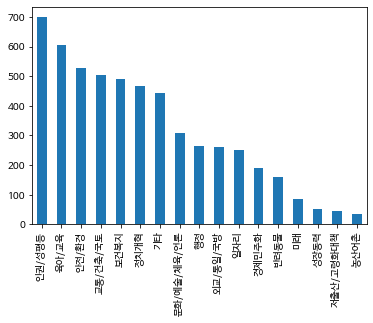

In [19]:
category_count = df2['category'].value_counts()
category_count
%matplotlib inline
category_count.plot(kind='bar')

In [0]:
sample_index = 38
sample_content = df2['content'][sample_index]
sample_title = df2['title'][sample_index]

In [21]:
sample_title

'영어회화전문강사제도는 유지되어야합니다.'

In [22]:
sample_content

'1. 영전강의고용안정을 원합니다\\n2.1년단위계약직으로 임신 출산육아 매우 곤란합니다\\n3. 성과급 호봉인정 상여금 급식비지원 전혀없으며 연봉인상 또한 없습니다\\n4.인권위의 무기직으로 전환 권고받았습니다\\n5.공공부문 비정규직 없애는건 문정부의 공약이며 이에따라 영전강만 제외하는것은 불공평합니다\\n저희는 정교사나 정규직을 원하는것이 아닙니다.\\n이 일을 계속 하길 희망할 뿐입니다.  문재인대통령님께선 일자리창출을 매우 중요하게 생각하셨습니다.  일자리창출 만큼 중요한것이 일자리 유지입니다.  창출만 하고 유지가 되지 않는다면 그저  형식적인 정책일 뿐입니다. 하루빨리 결과가 나와  안정된 마음으로 일하고 싶습니다.  감사합니다.'

In [0]:
def preprocessing(text):

    # 개행문자 제거
  text= str(text)
  text = re.sub('\\\\n', ' ', text)
    # 특수문자 제거
    # 특수문자나 이모티콘 등은 때로는 의미를 갖기도 하지만 여기에서는 제거했습니다.
  text = re.sub('[?.,;:|\)*~`’!^\-_+<>@\#$%&-=#}※]', '', text)
    # 한글, 영문, 숫자만 남기고 모두 제거하도록 합니다.
    # text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z0-9]', ' ', text)
    # 한글, 영문만 남기고 모두 제거하도록 합니다.
  text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z]', ' ', text)
  return text
# 불용어 제거
def remove_stopwords(text):
    tokens = text.split(' ')
    stops = ['수', '현', '있는', '있습니다', '그', '년도', '합니다', '하는', '및', '제', '할', '하고', '더', '대한', '한', '그리고', '월', '저는', '없는', '입니다', '등', '일', '많은', '이런', '것은', '왜','같은', '같습니다', '없습니다', '위해', '한다','이', '년', '것입니다', '또한', '현재', '것이', '우리', '모든', '않고', '것을', '위한', '생각합니다', '저희', '것', '너무', '때문에', '대해', '중', '또', '다시', '아니라', '후', '바랍니다', '있도록', '아닌', '지금', '통해', '이렇게']
    meaningful_words = [w for w in tokens if not w in stops]
    return ' '.join(meaningful_words)
# 샘플데이터에 적용
pre_sample_content = preprocessing(sample_content)
pre_sample_content = remove_stopwords(pre_sample_content)

In [24]:
pre_sample_content

' 영전강의고용안정을 원합니다 년단위계약직으로 임신 출산육아 매우 곤란합니다  성과급 호봉인정 상여금 급식비지원 전혀없으며 연봉인상 인권위의 무기직으로 전환 권고받았습니다 공공부문 비정규직 없애는건 문정부의 공약이며 이에따라 영전강만 제외하는것은 불공평합니다 저희는 정교사나 정규직을 원하는것이 아닙니다 일을 계속 하길 희망할 뿐입니다  문재인대통령님께선 일자리창출을 매우 중요하게 생각하셨습니다  일자리창출 만큼 중요한것이 일자리 유지입니다  창출만 유지가 되지 않는다면 그저  형식적인 정책일 뿐입니다 하루빨리 결과가 나와  안정된 마음으로 일하고 싶습니다  감사합니다'

In [25]:
%time presentences1 = df['content'].apply(preprocessing)
%time sentences1 = presentences1.apply(remove_stopwords)

CPU times: user 298 ms, sys: 4.8 ms, total: 303 ms
Wall time: 307 ms
CPU times: user 741 ms, sys: 5.38 ms, total: 746 ms
Wall time: 748 ms


In [26]:
%time presentences2 = df2['content'].apply(preprocessing)
%time sentences2 = presentences2.apply(remove_stopwords)

CPU times: user 438 ms, sys: 8.35 ms, total: 446 ms
Wall time: 449 ms
CPU times: user 1.1 s, sys: 1.75 ms, total: 1.1 s
Wall time: 1.1 s


In [27]:
from soynlp.tokenizer import RegexTokenizer

tokenizer = RegexTokenizer()
tokenizer

In [28]:
# 전처리 이전의 샘플 텍스트로 토큰화
tokened_title = tokenizer.tokenize(sample_title)
tokened_title

['영어회화전문강사제도는', '유지되어야합니다', '.']

In [29]:
# 전처리 이후의 샘플 텍스트로 토큰화
tokened_content = tokenizer.tokenize(sample_content)
tokened_content[:30]

['1',
 '.',
 '영전강의고용안정을',
 '원합니다',
 '\\',
 'n',
 '2.1',
 '년단위계약직으로',
 '임신',
 '출산육아',
 '매우',
 '곤란합니다',
 '\\',
 'n',
 '3',
 '.',
 '성과급',
 '호봉인정',
 '상여금',
 '급식비지원',
 '전혀없으며',
 '연봉인상',
 '또한',
 '없습니다',
 '\\',
 'n',
 '4',
 '.',
 '인권위의',
 '무기직으로']

In [31]:
%time tokens1 = sentences1.apply(tokenizer.tokenize)
tokens1[:5]

CPU times: user 4.05 s, sys: 58.2 ms, total: 4.11 s
Wall time: 4.11 s


7     [존경하옵는, 문재인대통령님께, 중국원양자원이라는, KOSPI, 상장사의, 소액, ...
21    [대통령님, 안녕하세요, 임용을, 준비하고, 수험생입니다, 처음, 기간제, 정규직화...
24    [대통령님, 안녕하세요, 임용을, 준비하고, 수험생입니다, 처음, 기간제, 정규직화...
28    [안녕하십니까, 대통령님, 간단하게, 제소개, 부터, 하겠습니다, 치위생과, 학년,...
38    [영전강의고용안정을, 원합니다, 년단위계약직으로, 임신, 출산육아, 매우, 곤란합니...
Name: content, dtype: object

In [33]:
%time tokens2 = sentences2.apply(tokenizer.tokenize)
tokens2[:5]

CPU times: user 5.92 s, sys: 91.2 ms, total: 6.01 s
Wall time: 6.02 s


7     [존경하옵는, 문재인대통령님께, 중국원양자원이라는, KOSPI, 상장사의, 소액, ...
13    [현황, 우리들, 아버지께서는, 여년전, 북의, 남침으로, 조국이, 위기에, 처했을...
21    [대통령님, 안녕하세요, 임용을, 준비하고, 수험생입니다, 처음, 기간제, 정규직화...
24    [대통령님, 안녕하세요, 임용을, 준비하고, 수험생입니다, 처음, 기간제, 정규직화...
28    [안녕하십니까, 대통령님, 간단하게, 제소개, 부터, 하겠습니다, 치위생과, 학년,...
Name: content, dtype: object

In [34]:
print(tokens1.shape)
print(tokens2.shape)

(3359,)
(5388,)


In [35]:
tokens1.tail()

394599    [주파이, 개발한, 셀는, 알콜성, 간경변, 치료제, 한해, 약, 만, 명, 이상이...
394730    [이번, 버닝썬, 사건과, 관련된, 역삼지구대, 그곳에서, 년에, 명의, 경찰들이,...
394876    [지령, 호, 월간, 순국이, 폐간, 위기에, 놓였습니다, 순국지는, 사단법인, 대...
395247    [k, 스위스, 르까프, 머렐, 화승, 개, 브렌드, 매니져들한테, 판매대금, 어음...
395352    [섬에, 다방이나, 성매매, 업자들에게, 과한, 빚이나, 폭력으로, 묶여, 삶을, ...
Name: content, dtype: object

In [0]:
# word2vec 모델 학습에 로그를 찍을 수 있도록 하기
import logging
logging.basicConfig(
    format='%(asctime)s : %(levelname)s : %(message)s', 
    level=logging.INFO)

In [38]:
# 초기화 및 모델 학습
from gensim.models import word2vec

# 모델 학습
model = word2vec.Word2Vec(tokens1, size=300, min_count=3, window=5, iter=100)    #임베딩되는 단어의 벡터가 300차원, 빈도수가 최소3이상부터, WindowSize는 5, Epoch100으로 학습

model

2020-05-26 01:29:09,795 : INFO : 'pattern' package not found; tag filters are not available for English
2020-05-26 01:29:09,803 : INFO : collecting all words and their counts
2020-05-26 01:29:09,803 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-05-26 01:29:10,075 : INFO : collected 222147 word types from a corpus of 886860 raw words and 3359 sentences
2020-05-26 01:29:10,076 : INFO : Loading a fresh vocabulary
2020-05-26 01:29:10,331 : INFO : effective_min_count=3 retains 46181 unique words (20% of original 222147, drops 175966)
2020-05-26 01:29:10,332 : INFO : effective_min_count=3 leaves 681228 word corpus (76% of original 886860, drops 205632)
2020-05-26 01:29:10,450 : INFO : deleting the raw counts dictionary of 222147 items
2020-05-26 01:29:10,455 : INFO : sample=0.001 downsamples 0 most-common words
2020-05-26 01:29:10,457 : INFO : downsampling leaves estimated 681228 word corpus (100.0% of prior 681228)
2020-05-26 01:29:10,592 : INFO : estimated

In [39]:
# 모델 이름을 지정하고 저장
model_name = '1minwords'
model.save(model_name)

2020-05-26 01:32:51,688 : INFO : saving Word2Vec object under 1minwords, separately None
2020-05-26 01:32:51,689 : INFO : storing np array 'vectors' to 1minwords.wv.vectors.npy
2020-05-26 01:32:51,732 : INFO : not storing attribute vectors_norm
2020-05-26 01:32:51,733 : INFO : storing np array 'syn1neg' to 1minwords.trainables.syn1neg.npy
2020-05-26 01:32:51,783 : INFO : not storing attribute cum_table
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
2020-05-26 01:32:51,870 : INFO : saved 1minwords


In [41]:
# 비교하기위한 모델 하나 더 생성
model2 = word2vec.Word2Vec(tokens2, size=100, min_count=1, window=3, iter=50)    #임베딩되는 단어의 벡터가 100차원, 빈도수가 최소1이상부터, WindowSize는 3, Epoch50으로 학습

model2

2020-05-26 01:33:17,502 : INFO : collecting all words and their counts
2020-05-26 01:33:17,505 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-05-26 01:33:17,919 : INFO : collected 297328 word types from a corpus of 1318037 raw words and 5388 sentences
2020-05-26 01:33:17,920 : INFO : Loading a fresh vocabulary
2020-05-26 01:33:18,807 : INFO : effective_min_count=1 retains 297328 unique words (100% of original 297328, drops 0)
2020-05-26 01:33:18,808 : INFO : effective_min_count=1 leaves 1318037 word corpus (100% of original 1318037, drops 0)
2020-05-26 01:33:19,613 : INFO : deleting the raw counts dictionary of 297328 items
2020-05-26 01:33:19,618 : INFO : sample=0.001 downsamples 0 most-common words
2020-05-26 01:33:19,619 : INFO : downsampling leaves estimated 1318037 word corpus (100.0% of prior 1318037)
2020-05-26 01:33:20,459 : INFO : estimated required memory for 297328 words and 100 dimensions: 386526400 bytes
2020-05-26 01:33:20,460 : INFO : res

In [42]:
# 모델 이름을 지정하고 저장
model_name = '1minwords2'
model2.save(model_name)

2020-05-26 01:37:39,106 : INFO : saving Word2Vec object under 1minwords2, separately None
2020-05-26 01:37:39,107 : INFO : storing np array 'vectors' to 1minwords2.wv.vectors.npy
2020-05-26 01:37:39,218 : INFO : not storing attribute vectors_norm
2020-05-26 01:37:39,219 : INFO : storing np array 'syn1neg' to 1minwords2.trainables.syn1neg.npy
2020-05-26 01:37:39,517 : INFO : not storing attribute cum_table
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
2020-05-26 01:37:40,231 : INFO : saved 1minwords2


In [43]:
model2.wv.syn0.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  """Entry point for launching an IPython kernel.


(297328, 100)

In [44]:
type(model2.wv.syn0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  """Entry point for launching an IPython kernel.


numpy.ndarray

In [45]:
# 단어 사전 수
print(len(model.wv.vocab))
print(len(model2.wv.vocab))

46181
297328


In [46]:
# 단어 사전에서 상위 단어 보기
vocab = model.wv.vocab
sorted(vocab, key=vocab.get, reverse=True)[:10]

['하지만', '다른', '제가', '이러한', '하지', '없이', '큰', '그러나', '이미', '그런데']

In [47]:
vocab2 = model2.wv.vocab
sorted(vocab2, key=vocab2.get, reverse=True)[:10]

['하지만', '다른', '제가', '정말', '이러한', '하지', '다', '그러나', '모두', '없이']

In [0]:
# voacab을 직접찍어 보면 dict 구조로 되어 있는 것을 볼 수 있습니다.
vocab

{'존경하옵는': <gensim.models.keyedvectors.Vocab at 0x7f5d0c9b3e48>,
 '문재인대통령님께': <gensim.models.keyedvectors.Vocab at 0x7f5d0ae05cc0>,
 '소액': <gensim.models.keyedvectors.Vocab at 0x7f5d0c9107f0>,
 '주주입니다': <gensim.models.keyedvectors.Vocab at 0x7f5d39caea20>,
 '이번': <gensim.models.keyedvectors.Vocab at 0x7f5d0b2b3c50>,
 '감사인': <gensim.models.keyedvectors.Vocab at 0x7f5d0b2b3ef0>,
 '판단이': <gensim.models.keyedvectors.Vocab at 0x7f5d0c0591d0>,
 '내려져': <gensim.models.keyedvectors.Vocab at 0x7f5d0ae00198>,
 '꿈에도': <gensim.models.keyedvectors.Vocab at 0x7f5d0ae18d30>,
 '상장폐지를': <gensim.models.keyedvectors.Vocab at 0x7f5d0ae18d68>,
 '목전에': <gensim.models.keyedvectors.Vocab at 0x7f5d0ae18da0>,
 '두고': <gensim.models.keyedvectors.Vocab at 0x7f5d0ae18dd8>,
 '국내에': <gensim.models.keyedvectors.Vocab at 0x7f5d0ae18e10>,
 '천문학적인': <gensim.models.keyedvectors.Vocab at 0x7f5d0ae18e48>,
 '금액을': <gensim.models.keyedvectors.Vocab at 0x7f5d0ae18e80>,
 '취득하여': <gensim.models.keyedvectors.Vocab at 0x7f5d0ae18eb8

In [48]:
# Counter로 자주 등장하는 단어 보기
from collections import Counter
dict(Counter(vocab).most_common(20))

{'경우': <gensim.models.keyedvectors.Vocab at 0x7f951183a908>,
 '그러나': <gensim.models.keyedvectors.Vocab at 0x7f9511827198>,
 '그런데': <gensim.models.keyedvectors.Vocab at 0x7f9511827b70>,
 '다': <gensim.models.keyedvectors.Vocab at 0x7f9511821c50>,
 '다른': <gensim.models.keyedvectors.Vocab at 0x7f9510adb8d0>,
 '될': <gensim.models.keyedvectors.Vocab at 0x7f9511843470>,
 '때': <gensim.models.keyedvectors.Vocab at 0x7f9511819128>,
 '모두': <gensim.models.keyedvectors.Vocab at 0x7f9511827a20>,
 '않습니다': <gensim.models.keyedvectors.Vocab at 0x7f9510ae3358>,
 '없이': <gensim.models.keyedvectors.Vocab at 0x7f9510b00908>,
 '이러한': <gensim.models.keyedvectors.Vocab at 0x7f9510ae9080>,
 '이미': <gensim.models.keyedvectors.Vocab at 0x7f9510af3ef0>,
 '인해': <gensim.models.keyedvectors.Vocab at 0x7f9511814fd0>,
 '전': <gensim.models.keyedvectors.Vocab at 0x7f95118199e8>,
 '정말': <gensim.models.keyedvectors.Vocab at 0x7f9510af3390>,
 '제가': <gensim.models.keyedvectors.Vocab at 0x7f9510ae5198>,
 '제대로': <gensim.models.

In [49]:
dict(Counter(vocab2).most_common(20))

{'경우': <gensim.models.keyedvectors.Vocab at 0x7f950f149d30>,
 '국민의': <gensim.models.keyedvectors.Vocab at 0x7f950f17d550>,
 '그러나': <gensim.models.keyedvectors.Vocab at 0x7f950f16c400>,
 '그런데': <gensim.models.keyedvectors.Vocab at 0x7f950f17d0f0>,
 '다': <gensim.models.keyedvectors.Vocab at 0x7f950f1696d8>,
 '다른': <gensim.models.keyedvectors.Vocab at 0x7f950f181f98>,
 '모두': <gensim.models.keyedvectors.Vocab at 0x7f950f16cf60>,
 '않습니다': <gensim.models.keyedvectors.Vocab at 0x7f950ed062e8>,
 '없이': <gensim.models.keyedvectors.Vocab at 0x7f950f99d128>,
 '이러한': <gensim.models.keyedvectors.Vocab at 0x7f950f159c18>,
 '이미': <gensim.models.keyedvectors.Vocab at 0x7f950f991828>,
 '인해': <gensim.models.keyedvectors.Vocab at 0x7f950f155c18>,
 '잘': <gensim.models.keyedvectors.Vocab at 0x7f950ecc7320>,
 '전': <gensim.models.keyedvectors.Vocab at 0x7f950f15e9b0>,
 '정말': <gensim.models.keyedvectors.Vocab at 0x7f950eccbd68>,
 '제가': <gensim.models.keyedvectors.Vocab at 0x7f950f9bf438>,
 '제대로': <gensim.model

In [0]:
# 가장 적게 등장하는 단어
min(vocab, key=vocab.get)

'주주입니다'

In [0]:
min(vocab2, key=vocab2.get)

'중국원양자원이라는'

In [0]:
model.wv['사건']

array([ 1.3700577e+00, -8.4755194e-01, -6.7262113e-01, -2.2984440e+00,
       -2.1423364e+00, -2.6607746e-01,  6.7716676e-01, -3.6086514e+00,
        9.2710704e-01,  1.3281806e+00,  1.7560170e+00, -2.5800860e-01,
       -1.0220909e+00, -1.7501440e-02, -5.8116183e+00, -4.8365399e-01,
        1.4802508e+00,  2.0688891e+00, -1.4950570e+00, -4.0834165e+00,
        2.0026717e+00,  1.8692476e+00, -5.3945404e-01, -7.7716887e-01,
        1.4838663e-01, -1.0976843e+00, -1.6887301e+00, -4.4711862e+00,
       -9.3827403e-01,  6.9775879e-01,  1.6168100e+00,  2.4346061e+00,
        3.4508421e+00, -7.4043024e-01,  3.7378101e+00,  2.5370831e+00,
        1.4249858e+00, -2.3314035e+00,  9.9250811e-01, -2.6793473e+00,
       -4.6487246e+00, -1.9699681e-01,  1.2869987e+00,  2.0339346e+00,
       -2.4558723e+00,  2.5898249e+00, -6.5129995e-01,  8.7289232e-01,
        1.3259765e+00,  1.8217235e+00, -6.2381095e-01,  3.5753291e+00,
        2.8470075e+00, -1.8652241e+00,  3.8270874e+00,  4.8126221e-01,
      

In [0]:
model2.wv['사건']

array([-0.1723558 , -2.4956052 , -0.86811835, -2.1152034 , -1.7543594 ,
       -6.5133586 ,  3.2905362 , -3.3644385 , -0.87996   ,  0.05767065,
       -0.41554597,  2.9277925 , -1.5538882 , -1.3089852 , -4.9257565 ,
       -4.831844  ,  3.5565588 , -0.09714744,  0.04135131, -3.8626504 ,
       -2.153008  ,  0.59807724,  0.21819818, -2.879366  , -1.9714106 ,
        0.7477587 , -1.3802725 , -5.1397057 , -0.75662196, -1.7079976 ,
        1.9486821 ,  1.2176017 ,  3.2972965 , -0.21947871,  4.5674763 ,
        2.4218872 , -0.71861905,  2.5421886 ,  1.538279  , -4.575127  ,
       -3.4037838 , -0.6328984 , -1.4701679 ,  0.6045778 , -1.5672449 ,
        4.8830504 , -0.9878618 ,  3.2296312 ,  0.14958781,  4.3214283 ,
       -2.6918907 ,  6.188382  ,  2.4787588 , -2.9626203 ,  4.8640375 ,
       -1.063783  , -4.616278  , -2.3560286 ,  3.4587474 , -4.240468  ,
        0.6547005 ,  0.36431286, -1.735974  ,  2.1413698 , -0.6230632 ,
       -0.9514508 , -0.5871613 , -0.1656435 , -0.64399964, -0.66

In [0]:
model2.wv.syn0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  """Entry point for launching an IPython kernel.


array([[-2.0858989 , -0.44417334,  1.0912315 , ..., -0.40003347,
        -3.853017  , -4.85633   ],
       [-4.518672  , -1.3357291 ,  2.6315687 , ...,  9.966881  ,
        -5.18635   , -5.2233567 ],
       [ 7.3588204 , -0.06325703, -4.8362107 , ..., -3.4629574 ,
         2.4333713 , -0.85934657],
       ...,
       [-0.05534019,  0.17483802,  0.07196504, ...,  0.08788298,
         0.01260938,  0.03221761],
       [-0.03975998, -0.07248818,  0.07360578, ...,  0.22383152,
        -0.04247376,  0.04534285],
       [-0.06907416, -0.10879817,  0.06423286, ...,  0.11943538,
        -0.08539392,  0.02806946]], dtype=float32)

In [50]:
model.wv.most_similar('사건')

2020-05-26 01:38:37,362 : INFO : precomputing L2-norms of word weight vectors
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('레전드급', 0.5269381999969482),
 ('subway', 0.4886622726917267),
 ('경위를', 0.469257116317749),
 ('장자연', 0.4432228207588196),
 ('정유라', 0.4372221827507019),
 ('한국여성', 0.42676085233688354),
 ('타버린', 0.40278053283691406),
 ('몰래카메라', 0.4012931287288666),
 ('측근', 0.3933389186859131),
 ('돌아가겠다고', 0.3866051435470581)]

In [51]:
model2.wv.most_similar('사건')

2020-05-26 01:38:40,156 : INFO : precomputing L2-norms of word weight vectors
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('난리였었던', 0.7192776799201965),
 ('변사체로', 0.7020494341850281),
 ('서울특별시시민인권보호관결정', 0.7009807229042053),
 ('친형이', 0.6992357969284058),
 ('수급자는', 0.6914108395576477),
 ('해당동물원은', 0.6902114748954773),
 ('재수사해야', 0.6848735809326172),
 ('상세내용', 0.6827201247215271),
 ('목함', 0.677507758140564),
 ('간첩조작', 0.6733155846595764)]

In [52]:
model.wv.most_similar('페미니즘')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('일반여성들에게까지', 0.7142870426177979),
 ('여성단체들은', 0.6496987342834473),
 ('급진페미니스트들에게', 0.6168596744537354),
 ('남성혐오', 0.6138966083526611),
 ('여성민우회', 0.5965690612792969),
 ('사상과', 0.5938602685928345),
 ('여성친화적', 0.5808429718017578),
 ('페미니즘을', 0.5282443761825562),
 ('결론으로', 0.5236095190048218),
 ('동성애를', 0.5165920257568359)]

In [53]:
model2.wv.most_similar('페미니즘')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('일반여성들에게까지', 0.7682707905769348),
 ('여성단체들은', 0.7373258471488953),
 ('추종자들의', 0.7312794923782349),
 ('구시대적', 0.7191847562789917),
 ('남성혐오', 0.7132046222686768),
 ('여초', 0.709611713886261),
 ('의무교육화', 0.6983686089515686),
 ('결론으로', 0.6856368780136108),
 ('여성친화적', 0.6806399822235107),
 ('우월주의', 0.6788932085037231)]

In [54]:
# 유사도가 없는 단어 추출
model.wv.doesnt_match('부동산 증권 현금 코스닥 코스피'.split())

/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'현금'

In [0]:
# 가장 유사한 단어를 추출
model.wv.most_similar('공매도')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('무차입', 0.5701127052307129),
 ('공매도의', 0.5615040063858032),
 ('공매도가', 0.5237380862236023),
 ('셀트리온에', 0.4894073009490967),
 ('공매도는', 0.4805285334587097),
 ('금융사에', 0.477085143327713),
 ('공매도와', 0.4677584767341614),
 ('순기능이라는', 0.4500153660774231),
 ('물량으로', 0.449754536151886),
 ('코스피가', 0.449321448802948)]

In [0]:
model.wv.most_similar(positive=['주식', '증권'], negative=['현금'])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('증시', 0.42900270223617554),
 ('펀드', 0.42900025844573975),
 ('유통시키는', 0.41752612590789795),
 ('시장조성자', 0.4145206809043884),
 ('ICO', 0.4078596830368042),
 ('가상화폐', 0.40119847655296326),
 ('시장이', 0.400806188583374),
 ('증권사', 0.3973679840564728),
 ('제조사와', 0.39428824186325073),
 ('상장', 0.38987886905670166)]

# 단어 유사도

In [56]:
model2.wv.similarity('주식', '부동산')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.5288511

In [57]:
model2.wv.similarity('주식', '투자')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.63894904

In [0]:
model.wv.similarity('주식', '증권')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.44380185

In [0]:
model.wv.similarity('주식', '현금')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.111208946

In [0]:
model.wv.similarity('삼성', '증권')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.18334623

In [0]:
model.wv.similarity('삼성증권', '공매도')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.39058653

# 단어 유사도 시각화
* 필요한 라이브러리 로드

In [58]:
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim 
import gensim.models as g

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

model_name = '1minwords'
model = g.Doc2Vec.load(model_name)

2020-05-26 01:40:15,999 : INFO : loading Doc2Vec object from 1minwords
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
2020-05-26 01:40:16,085 : INFO : loading wv recursively from 1minwords.wv.* with mmap=None
2020-05-26 01:40:16,085 : INFO : loading vectors from 1minwords.wv.vectors.npy with mmap=None
2020-05-26 01:40:16,115 : INFO : setting ignored attribute vectors_norm to None
2020-05-26 01:40:16,116 : INFO : loading vocabulary recursively from 1minwords.vocabulary.* with mmap=None
2020-05-26 01:40:16,118 : INFO : loading trainables recursively from 1minwords.trainables.* with mmap=None
2020-05-26 01:40:16,119 : INFO : loading syn1neg from 1minwords.trainables.syn1neg.npy with mmap

In [60]:
model_name = '1minwords2'
model2 = g.Doc2Vec.load(model_name)

2020-05-26 01:40:51,199 : INFO : loading Doc2Vec object from 1minwords2
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
2020-05-26 01:40:52,190 : INFO : loading wv recursively from 1minwords2.wv.* with mmap=None
2020-05-26 01:40:52,190 : INFO : loading vectors from 1minwords2.wv.vectors.npy with mmap=None
2020-05-26 01:40:52,237 : INFO : setting ignored attribute vectors_norm to None
2020-05-26 01:40:52,238 : INFO : loading vocabulary recursively from 1minwords2.vocabulary.* with mmap=None
2020-05-26 01:40:52,238 : INFO : loading trainables recursively from 1minwords2.trainables.* with mmap=None
2020-05-26 01:40:52,239 : INFO : loading syn1neg from 1minwords2.trainables.syn1neg.npy wit

## T-SNE 차원축소
* 차원축소 기법인 T-SNE로 2차원으로 축소시켜 줍니다.

In [61]:
# Doc2Vec으로 만든 모델을 가져옴
vocab = list(model.wv.vocab)
# 모델의 단어를 피처로 지정해 준다.
X = model[vocab]

print('Feature의 길이 {}'.format(len(X)))
print(X[0][:10])
tsne = TSNE(n_components=2)

# 모든 단어를 그래프에 출력하면 글자가 너무 많이 겹치기 때문에 일부 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X[:150,:])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


Feature의 길이 46181
[ 0.3634694  -0.32081965 -0.07194477 -0.46207872 -0.66055083  1.0082569
 -0.7737712  -0.32295132  0.00877215  0.55631447]


In [62]:
vocab2 = list(model2.wv.vocab)
X2 = model2[vocab2]

print('Feature의 길이 {}'.format(len(X)))
print(X2[0][:10])

X2_tsne = tsne.fit_transform(X2[:150,:])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


Feature의 길이 46181
[-0.0326741   0.23605703  0.4626257  -0.08734509 -0.15326338  1.4170573
 -1.2595092  -0.33528727  0.731044    0.917875  ]


In [64]:
df_1 = pd.DataFrame(X_tsne, index=vocab[:150], columns=['x', 'y'])
df_1.shape

(150, 2)

In [68]:
df_2 = pd.DataFrame(X2_tsne, index=vocab2[:150], columns=['x','y'])
df_2.shape

(150, 2)

In [0]:
df.head(20)

,x,y
존경하옵는,5.043463,-1.176021
문재인대통령님께,3.367342,-1.401691
소액,2.747271,-1.944370
주주입니다,3.039411,-1.468366
이번,2.002440,-3.569634
감사인,2.819084,-1.363362
판단이,1.916180,-1.197124
내려져,2.838935,-1.203355
꿈에도,3.300817,0.009500
상장폐지를,2.375868,-1.632827


In [69]:
df_2.head()

,x,y
존경하옵는,-3.869676,-4.002146
문재인대통령님께,-2.945771,-3.009562
중국원양자원이라는,0.242186,-2.221137
KOSPI,0.375527,-2.195575
상장사의,0.993359,-2.351418


In [0]:
from matplotlib import font_manager

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = font_manager.FontProperties(fname=fontpath, size=20)

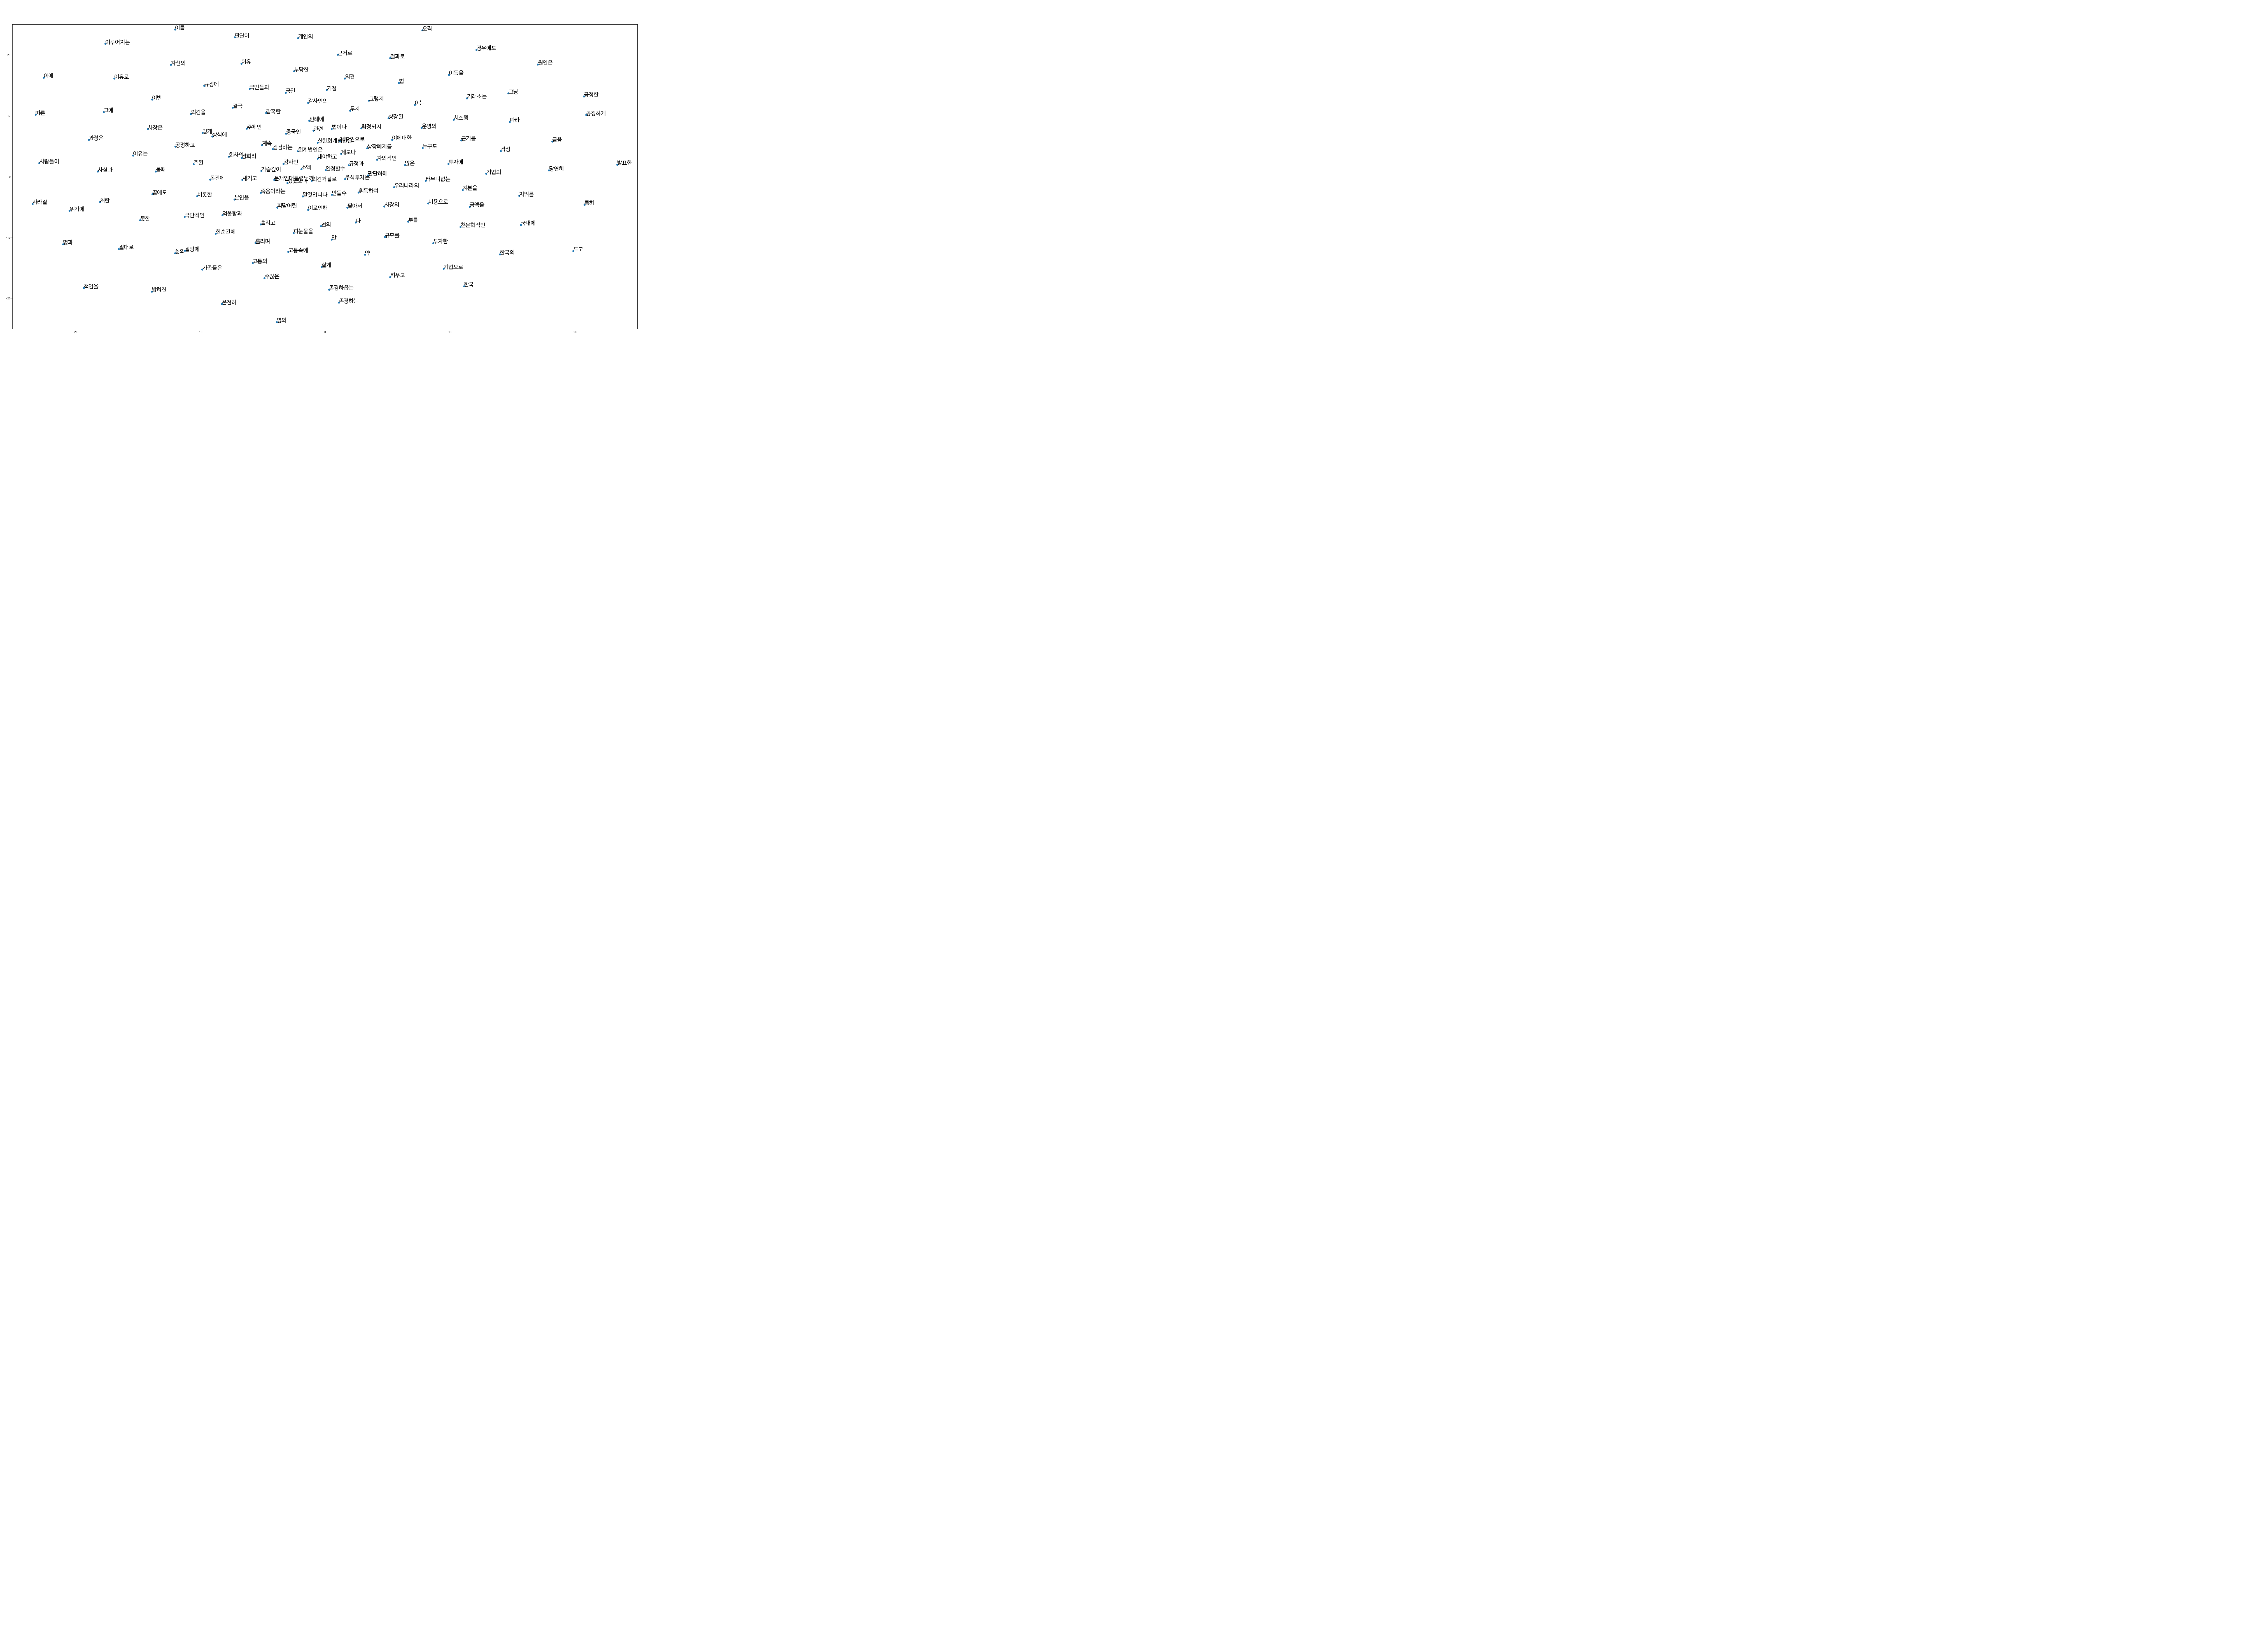

In [73]:
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df_1['x'], df_1['y'])

for word, pos in df_1.iterrows():
    ax.annotate(word, pos, fontsize=20)

plt.xlim(-25,25)
plt.ylim(-25,25)

plt.show()

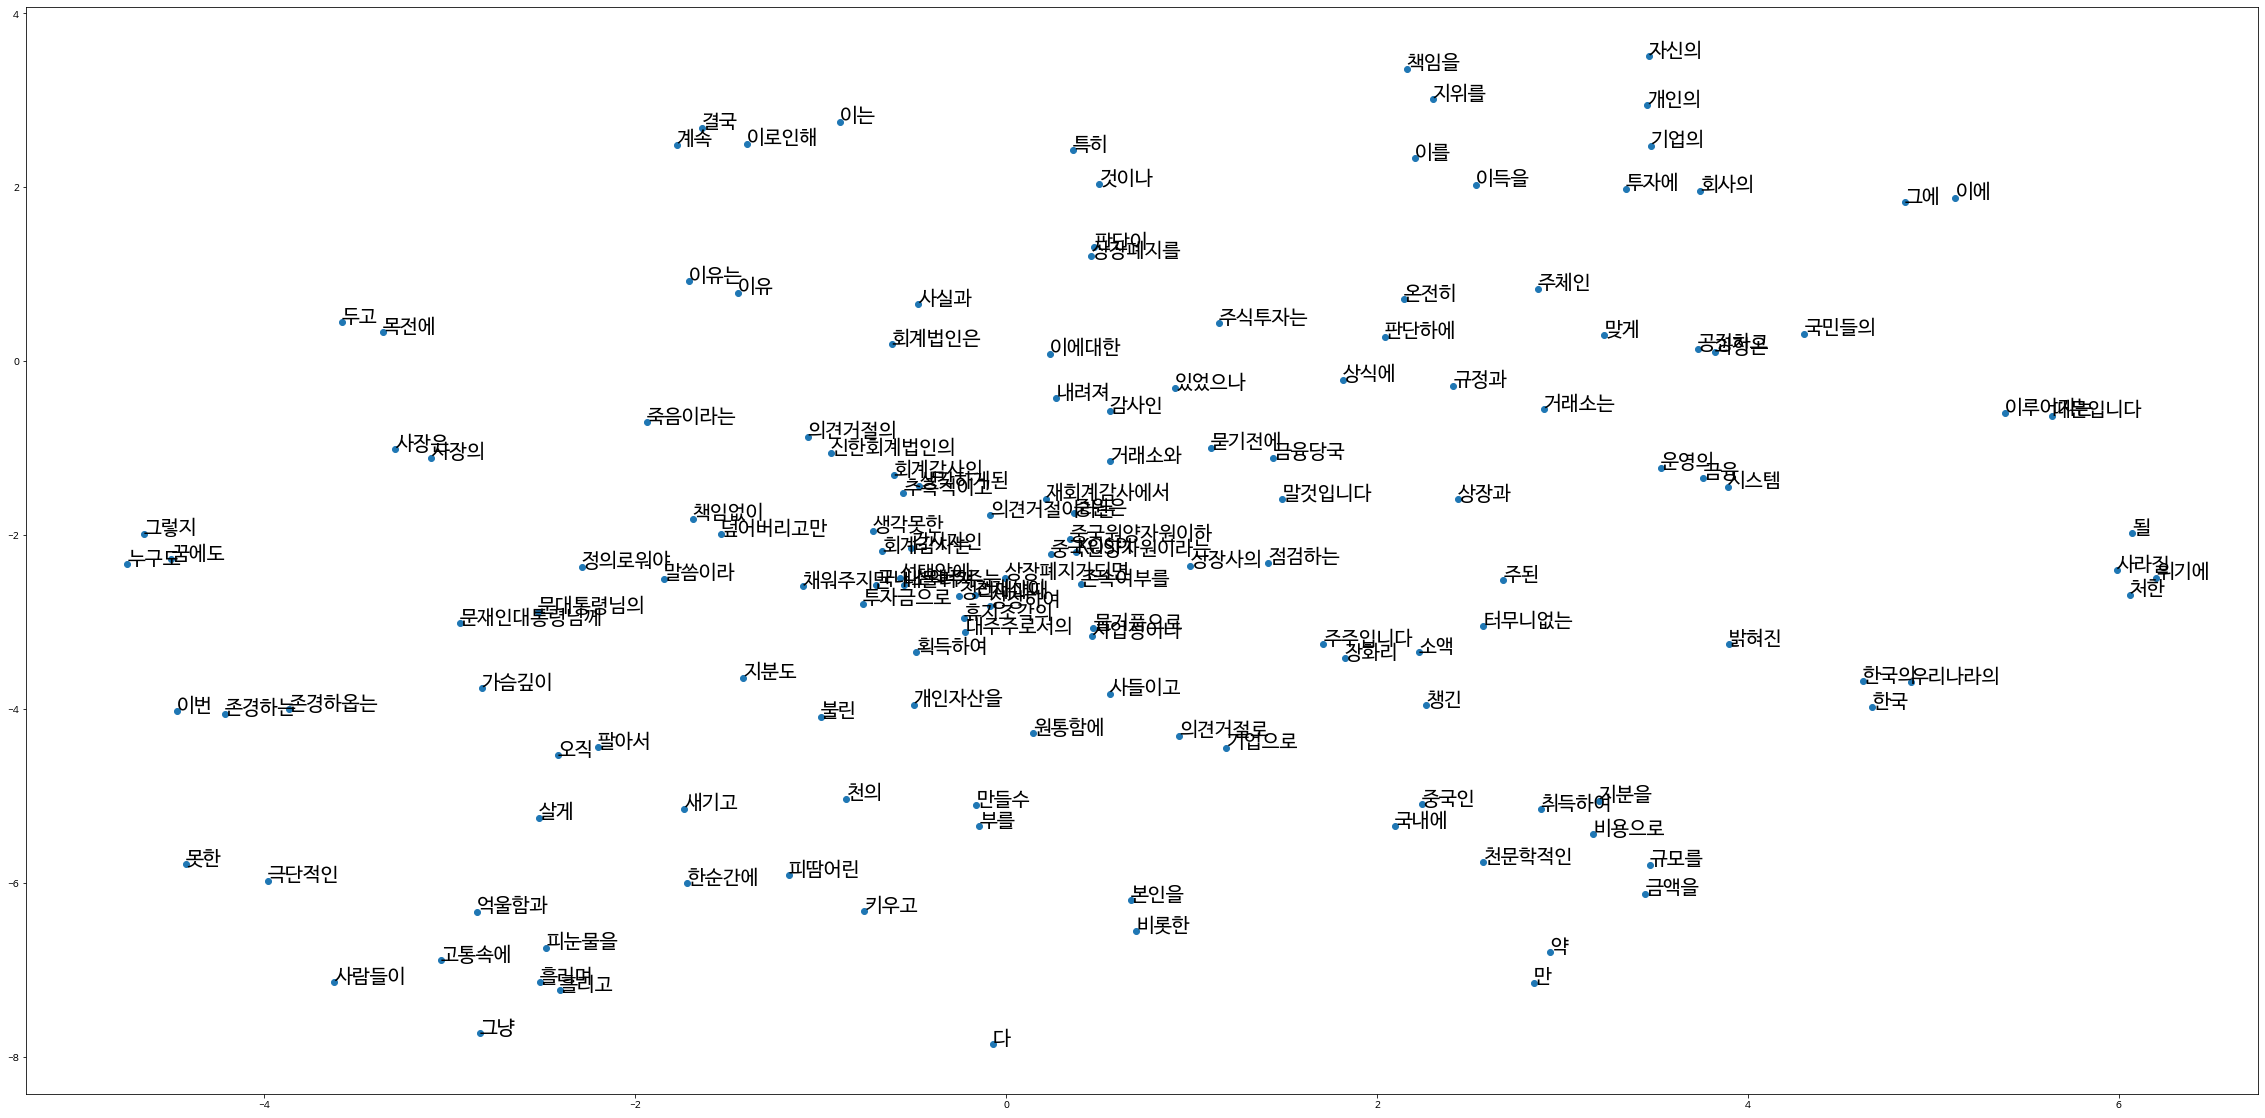

In [75]:
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df_2['x'], df_2['y'])

for word, pos in df_2.iterrows():
    ax.annotate(word, pos, fontsize=20)


plt.show()

In [0]:
vocab2 = list(model2.wv.vocab)
X2 = model2[vocab2]

print('Feature의 길이 {}'.format(len(X)))
print(X2[0][:10])

%time X2_tsne = tsne.fit_transform(X2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


Feature의 길이 46181
[-0.0326741   0.23605703  0.4626257  -0.08734509 -0.15326338  1.4170573
 -1.2595092  -0.33528727  0.731044    0.917875  ]


In [0]:
df_2 = pd.DataFrame(X2_tsne, index=vocab2, columns=['x','y'])
df_2.shape

In [0]:
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df_2['x'], df_2['y'])

plt.show()